# US Airline Sentiment Analysis
## By: Swaraj Tripathy

In this analysis, I will be analyzing tweets about US airlines in order to gain an understanding of the sentiment around those airlines. I will be using natural language processing techniques to convert the tweets into tabular form of the bag of words model, and creating a text classification model to determine the sentiment. The goal of this analysis is to build a text classification model to classify tweets about US airlines, and to gain an understanding of the overall sentiment surrounding various airlines. By identifying negative sentiment, airlines can make adjustments to improve their service.

## Exploratory Data Analysis

In [1]:
# load in the necessary libraries

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt 
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load in the dataset
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('drive/My Drive/Tweets.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# look at some of the data
data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
# shape of the dataset
data.shape

(14640, 15)

In [5]:
# statistical summary 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [6]:
# datatypes and null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
# null value counts
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Almost all of the airline_sentiment_gold, negativereason_gold, and tweet_coord are null. We will drop those columns before our analysis. We can also drop the tweet_id column since it is a unique identifier.

In [8]:
# drop the id column and columns with many nulls
data = data.drop(["tweet_id", "airline_sentiment_gold", "negativereason_gold", "tweet_coord"], axis = 1)

In [9]:
# look at value counts for categorical columns
for i in data.columns:
  if (data[i].dtype == object):
    print(data[i].value_counts())
    print("\n\n")
  

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64



Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64



United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64



JetBlueNews       63
kbosspotter       32
_mhertz           29
otisday           28
throthra          27
                  ..
ChrisJLeary        1
tracy_edes         1
NGottesman         1
chadlacalamita     1
sanyabun           1
Name: name, Length: 7701, dtype: int64



@united thanks                                                      

In [10]:
# drop the name column as we want the model to be generalizable 
# and we don't want to keep identifying information
data = data.drop("name", axis = 1)

In [11]:
# process the tweet time to extract the day
# since the tweets all came from February 2015, we are only concerned with the day of the week and time of day
# convert the column to a datetime datatypes
data["tweet_created"] = pd.to_datetime(data["tweet_created"])

In [12]:
# extract the weekday from the datetime
data["tweet_day"] = data["tweet_created"].dt.strftime("%A")

In [13]:
# extract the hour of day from the datetime
data["tweet_time"] = data["tweet_created"].dt.strftime("%H")

In [14]:
# remove leading zeros in tweet_time column
data["tweet_time"] = [hour.lstrip("0") for hour in data["tweet_time"]]

In [15]:
# replace blanks from the leading zero removal with 0
data["tweet_time"] = data["tweet_time"].replace("", 0)

In [16]:
# check the value counts to make sure the processing was done correctly
data["tweet_time"].value_counts()

9     1013
11     986
10     962
14     927
8      926
13     900
12     824
15     788
7      776
17     754
18     751
16     734
19     675
6      621
20     602
5      477
21     430
4      368
22     292
3      225
23     193
2      174
0      131
1      111
Name: tweet_time, dtype: int64

In [17]:
# drop the tweet_created column as we have extracted the information from it
data = data.drop("tweet_created", axis = 1)

In [18]:
# check the processed dataset so far
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_location,user_timezone,tweet_day,tweet_time
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,NaN,Eastern Time (US & Canada),Tuesday,11
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,NaN,Pacific Time (US & Canada),Tuesday,11
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,Lets Play,Central Time (US & Canada),Tuesday,11
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,NaN,Pacific Time (US & Canada),Tuesday,11
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,NaN,Pacific Time (US & Canada),Tuesday,11


In [19]:
# keep only the columns that will be used in data visualization
data = data.loc[:, ['airline_sentiment', 'negativereason', 'airline','text','tweet_day', 'tweet_time']]

In [20]:
# check null value counts
data.isnull().sum()

airline_sentiment       0
negativereason       5462
airline                 0
text                    0
tweet_day               0
tweet_time              0
dtype: int64

In [21]:
# replace the nulls in negativereason with 'none'
data['negativereason'] = data['negativereason'].fillna('None')

In [22]:
# check null value counts
data.isnull().sum()

airline_sentiment    0
negativereason       0
airline              0
text                 0
tweet_day            0
tweet_time           0
dtype: int64

No nulls in the dataset!

In [23]:
# we notice that the Delta airline is actually supposed to be JetBlue
data[data["airline"] == 'Delta']

,airline_sentiment,negativereason,airline,text,tweet_day,tweet_time
6746,positive,None,Delta,@JetBlue Yesterday on my way from EWR to FLL j...,Tuesday,11
6747,neutral,None,Delta,@JetBlue I hope so because I fly very often an...,Tuesday,11
6748,neutral,None,Delta,"@JetBlue flight 1041 to Savannah, GA",Tuesday,11
6749,negative,Flight Attendant Complaints,Delta,"@JetBlue They weren't on any flight, they just...",Tuesday,11
6750,negative,Bad Flight,Delta,@JetBlue everyone is here but our pilots are n...,Tuesday,11
...,...,...,...,...,...,...
8963,neutral,None,Delta,"@JetBlue CEO weighs profits, flyers - @Chronic...",Tuesday,4
8964,negative,Can't Tell,Delta,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,Monday,23
8965,neutral,None,Delta,@JetBlue's new CEO seeks the right balance to ...,Monday,23
12038,negative,longlines,Delta,@DeltaAssist now at 57 minutes waiting on Silv...,Tuesday,10


In [24]:
# replace Delta in the airlines with Jet Blue
data["airline"] = data["airline"].replace("Delta", "Jet Blue")

## Data Visualizations

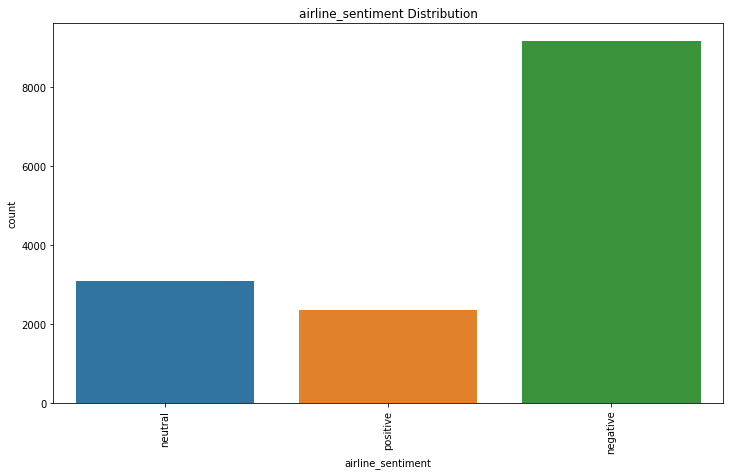

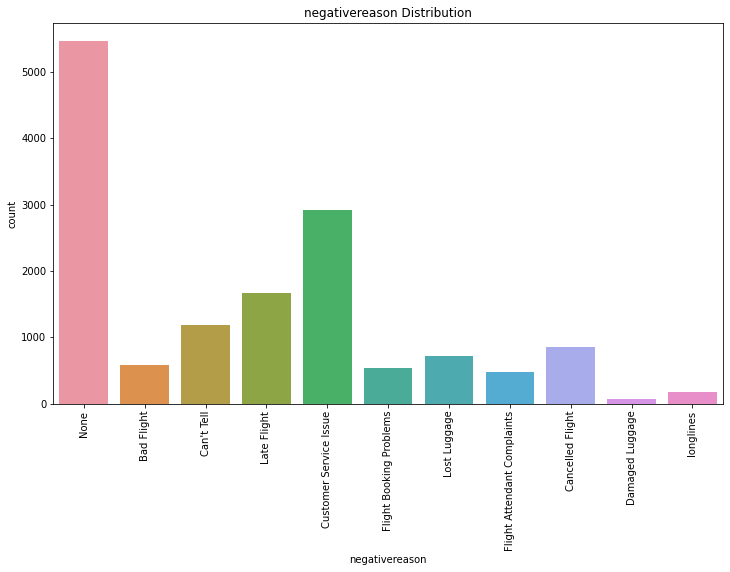

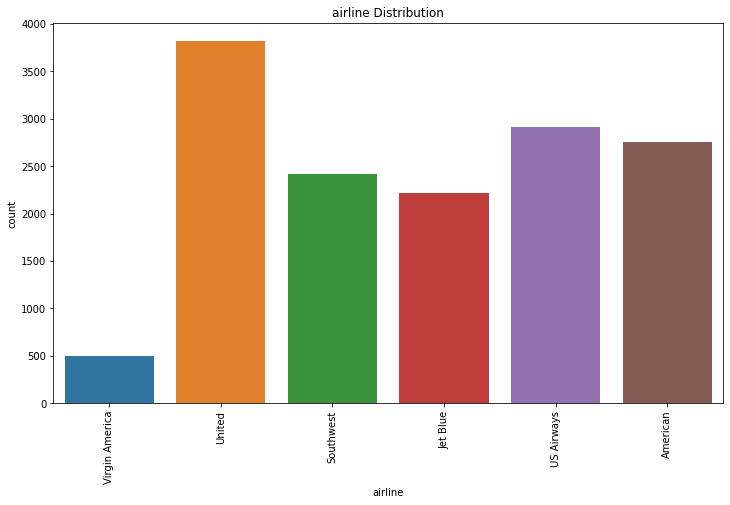

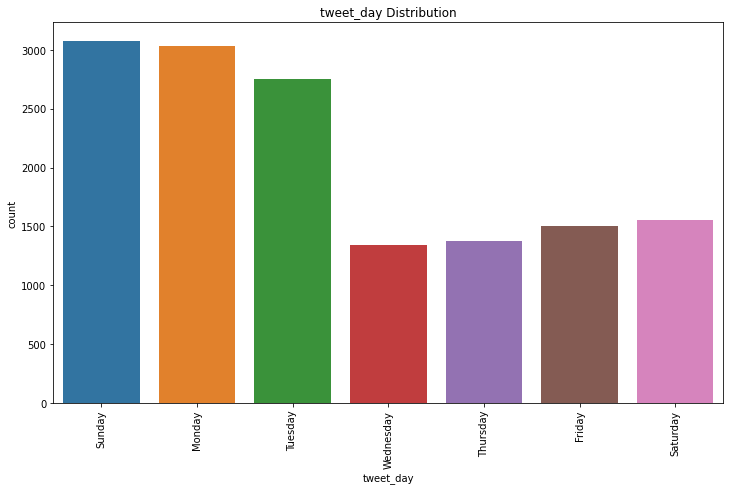

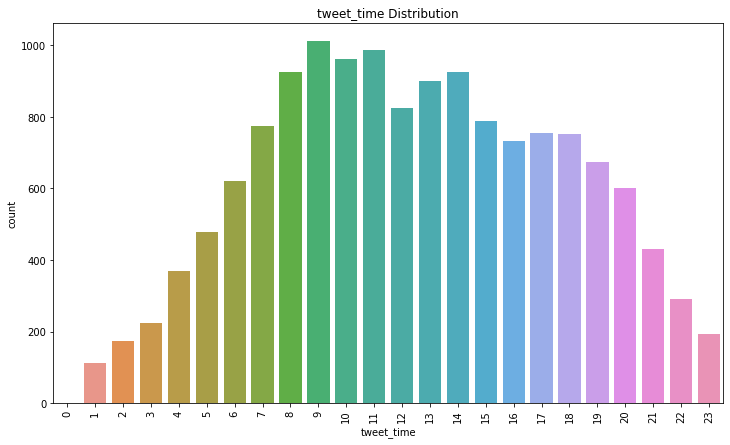

In [25]:
# target variable sentiment distribution
columns = list(data.columns)
columns.pop(3)
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
hour_order = list(range(0, 24))
hour_order = [str(i) for i in hour_order]
for col in columns:
  plt.figure(figsize = (12, 7))
  plt.xticks(rotation = 90)
  plt.title(col + " Distribution")
  if (col == "tweet_day"):
    sns.countplot(data = data, x = col, order = weekday_order);
  elif (col == "tweet_time"):
    sns.countplot(data = data, x = col, order = hour_order);
  else:
    sns.countplot(data = data, x = col);
  plt.show()
  print("\n")

- There are many more negative tweets than positive or neutral tweets
- The most common negative reason was a customer service issue
- United airlines had the most negative tweets while Virgin America had the least
- There were many more tweets on Sunday, Monday, and Tuesday than other days
- The most tweets occured in late morning, around 9-11 AM

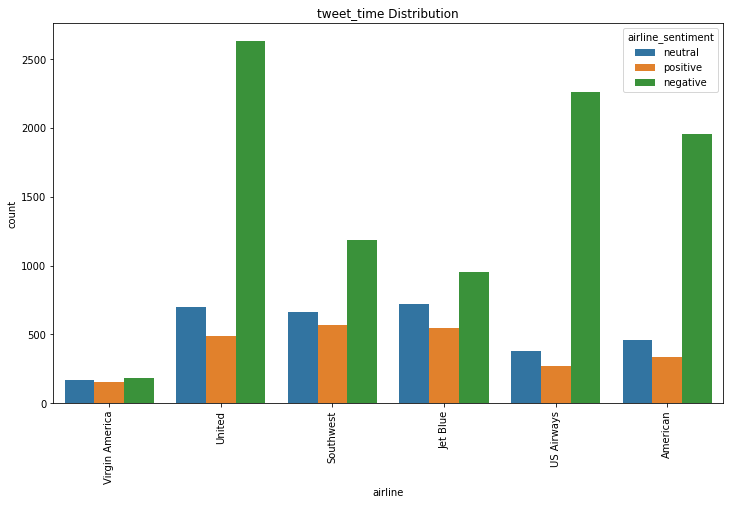

In [26]:
# airline sentiment by airline
plt.figure(figsize = (12, 7))
plt.xticks(rotation = 90)
plt.title(col + " Distribution")
sns.countplot(data = data, x = "airline", hue = "airline_sentiment");

- Relatively, United seems to have the most negative sentiment
- Jet Blue has the least negative sentiment relative to the total number of tweets about it
- Southwest also has pretty low negative sentiment, but not as good as Delta
- Virgin America has about equal positive and negative tweets
- Overall, United, US Airways, and American airlines have proportionately high amounts of negative sentiment tweets

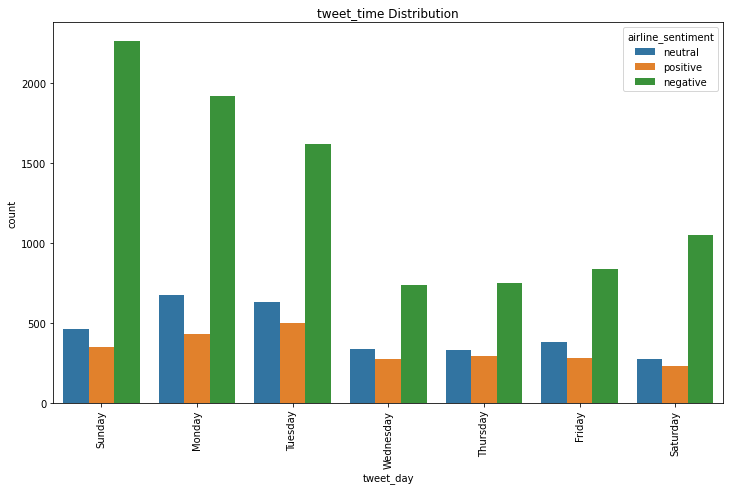

In [27]:
# airline sentiment by day of the week
plt.figure(figsize = (12, 7))
plt.xticks(rotation = 90)
plt.title(col + " Distribution")
sns.countplot(data = data, x = "tweet_day", hue = "airline_sentiment", order = weekday_order);

- Sundays had the most negative sentiment, followed by Monday and Tuesday
- Tuesday has the highest positive sentiment
- Overall, Wednesday seems to me the calmest day with the least overall tweets

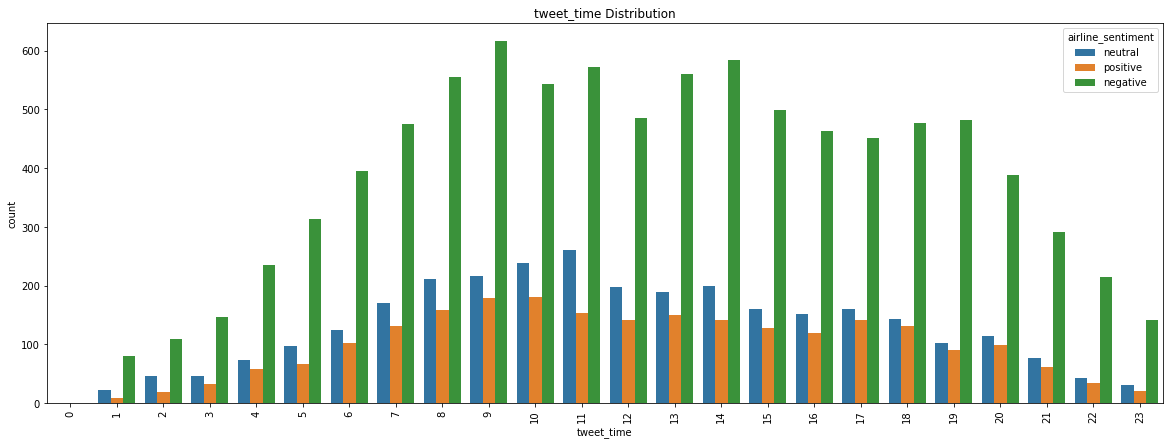

In [28]:
# airline sentiment by time of day
plt.figure(figsize = (20, 7))
plt.xticks(rotation = 90)
plt.title(col + " Distribution")
sns.countplot(data = data, x = "tweet_time", hue = "airline_sentiment", order = hour_order);

- The middle of the day from 9 AM to 2PM seem to have the most negative tweets
- Despite this, noon seems to be relatively calm in overall negative tweets
- 11 AM seems to have an increase in neutral tweets as well
- 9 AM has the most negative tweets overall

## Text Preprocessing

In [29]:
# only keep the text and sentiment columns for the model
data = data.loc[:, ['airline_sentiment','text']]

In [30]:
# remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [31]:
# replace contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [32]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [33]:
# tokenize the data
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis = 1)

In [34]:
# check the tokenized data
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, com..."
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Mu..."
3,negative,"[@, VirginAmerica, it, is, really, aggressive,..."
4,negative,"[@, VirginAmerica, and, it, is, a, really, big..."


In [35]:
# create the list of stopwords to remove
# also want to remove airline twitter names as the tweets were targeted at airlines
airlines = ["virginamerica", "united", "southwestair", "jetblue", "usairways", "americanair"]
stopwords = stopwords.words('english')
stopwords = stopwords + airlines

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
              "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
              "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so we don't remove them from original data

stopwords = list(set(stopwords) - set(customlist))  

In [38]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
# function to remove non ascii characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [40]:
# function to convert text to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [41]:
# function to remove punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [42]:
# function to remove stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [43]:
# function to lemmatize the text
lemmatizer = WordNetLemmatizer()

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [44]:
# function to apply the text processing functions defined above
# also reconnects the text with spaces between words
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [45]:
# apply the text processing to our text
data['text'] = data.apply(lambda row: normalize(row['text']), axis = 1)
data.head()

,airline_sentiment,text
0,neutral,dhepburn say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainmen...
4,negative,really big bad thing


## Wordcloud Visualizations

In [46]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis = 1) # Tokenization of data

In [47]:
# function to show wordclouds
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords = stopwords, 
                                        background_color = 'white',          # Setting the different parameter of stopwords
                                        colormap ='viridis', 
                                        width = 800, 
                                        height = 600).generate(text)
    
    plt.figure(figsize=(14, 11), frameon = True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize = 30)
    plt.show()

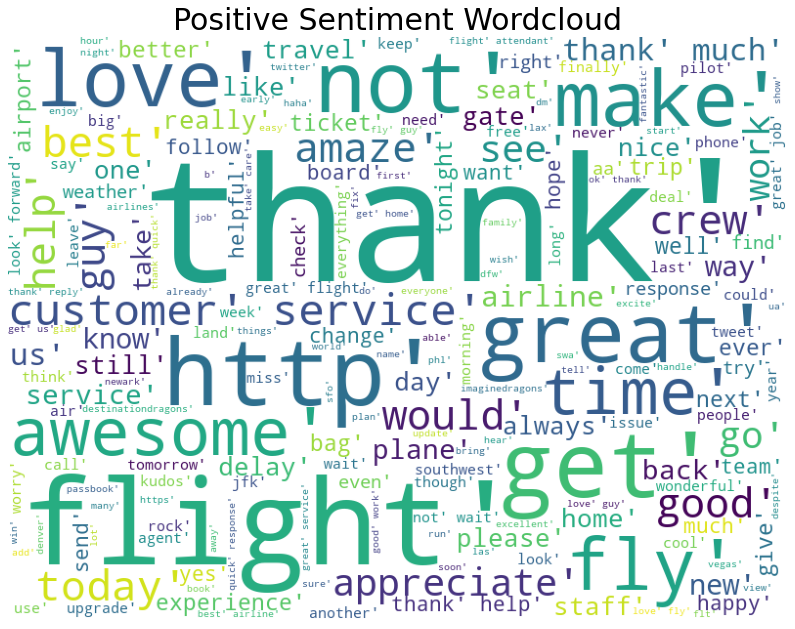

In [48]:
# wordcloud of positive sentiment
show_wordcloud(data[data.airline_sentiment == "positive"], "Positive Sentiment Wordcloud")

The main positive words are thank, great, love, awesome, and service, which are all positive words. Some other important words are flight and fly, which are common in any airline related tweets. Not and make are also common words, which are not necessarily positive, but more neutral.

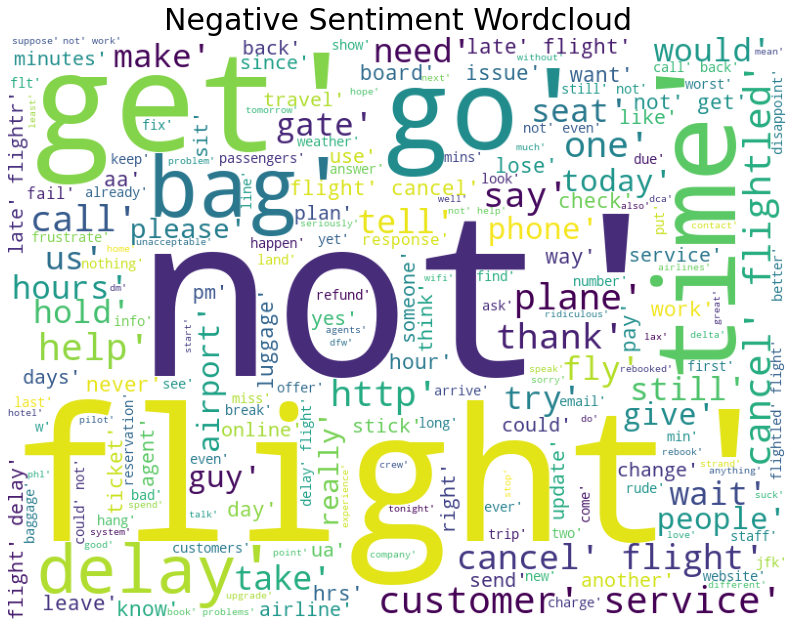

In [49]:
# wordcloud of negative sentiment
show_wordcloud(data[data.airline_sentiment == "negative"], "Negative Sentiment Wordcloud")

The most common negative words are not, get, go, bag, time, and delay. These are typically words used in complaints of flight issues with lost bags or flight delays. Flight is also a common word again. Customer and service also appear in the negative chart just as they were in the positive wordcloud.

## Model Building
### Count Vectorization

In [59]:
# re-combine the text data as we had tokenized it earlier
text = []
for i in data["text"]:
  text.append(" ".join(i))

data["text"] = text

In [60]:
# we will first use the count vectorizer
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features = 2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()  

In [61]:
# shape of the features array
data_features.shape

(14640, 2000)

In [66]:
# use the label encoder to label our traget variable
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = data['airline_sentiment']
labels = le.fit_transform(labels)

In [67]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size = 0.2, random_state = 1)

In [68]:
# Using Random Forest to build model for the classification of tweets
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators = 10, n_jobs = 4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv = 10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7415983606557377


In [70]:
# Finding optimal number of base learners using k-fold CV
base_ln = [x for x in range(1, 25)]

In [71]:
# K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

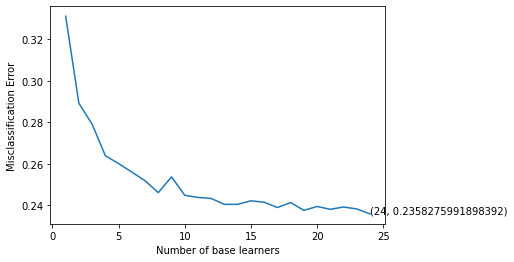

In [72]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords = 'data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [73]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7510245901639344

Our optimized model has a little over 75% accuracy, which is a slight improvement of the 74% accuracy on the original model.

In [74]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

0.7510245901639343


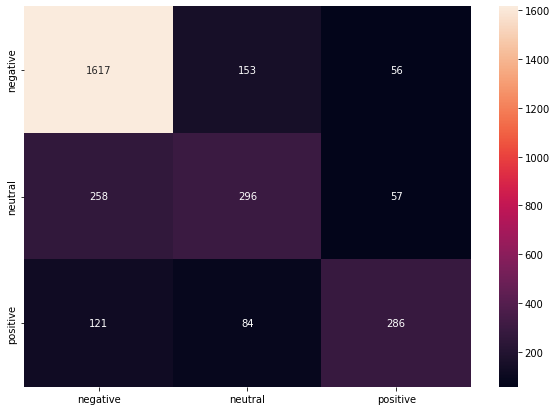

In [83]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(metrics.f1_score(y_test, result, average = 'micro'))

classes = le.inverse_transform([0, 1, 2])

df_cm = pd.DataFrame(conf_mat, index = classes,
                     columns = classes)
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt = 'g');

The model predicted a lot of tweets that were actually neutral to be negative, and a good amount of positive tweets to be negative as well. The model did best at correctly predicting negative tweets.

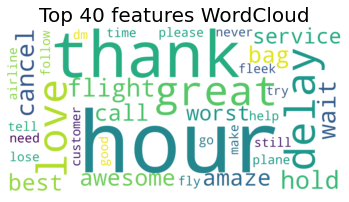

In [78]:
# wordcloud of top 40 features
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features = ''                                            # Addition of top 40 feature into top_feature after training the model
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += ' '

from wordcloud import WordCloud    
wordcloud = WordCloud(background_color = "white", 
                      colormap = 'viridis',
                      width = 2000, 
                      height = 1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.figure(1, figsize = (14, 11), frameon = 'equal')
plt.title('Top 40 features WordCloud', fontsize = 20)
plt.axis("off")
plt.show();

The top features were hour, thank, love, delay, and cancel.

### Term Frequency(TF) - Inverse Document Frequency(IDF) Vectorizer

In [84]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [85]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size = 0.2, random_state = 1)

In [86]:
# Using Random Forest to build model for the classification of tweets
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators = 10, n_jobs = 4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv = 10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7491803278688525


In [87]:
# K-Fold Cross - validation
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

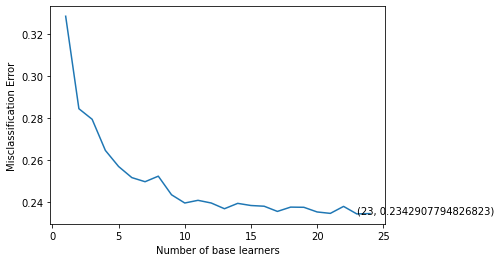

In [88]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords = 'data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [89]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7588797814207651

The accuracy increased a little again by optimizing the model to about 76% from 75% in the original model.

In [90]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

0.7588797814207651


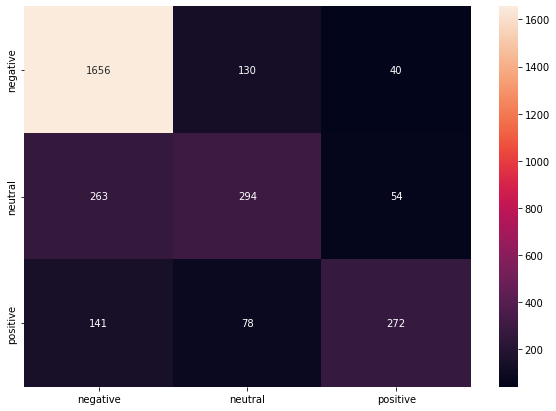

In [91]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(metrics.f1_score(y_test, result, average = 'micro'))

classes = le.inverse_transform([0, 1, 2])

df_cm = pd.DataFrame(conf_mat, index = classes,
                     columns = classes)
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt = 'g');

The model performed similarly to the count vectorizer model. It misclassified many neutral and positive tweets as negative, but overall classified negative tweets well.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


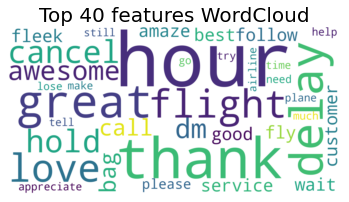

In [92]:
# wordcloud of top 40 features
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features = ''                                            # Addition of top 40 feature into top_feature after training the model
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features += all_features[i]
    top_features += ' '

from wordcloud import WordCloud    
wordcloud = WordCloud(background_color = "white", 
                      colormap = 'viridis',
                      width = 2000, 
                      height = 1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.figure(1, figsize = (14, 11), frameon = 'equal')
plt.title('Top 40 features WordCloud', fontsize = 20)
plt.axis("off")
plt.show();

The most important features in this model were hour, thank, great, flight, delay and cancel. These are similar words to the count vectorizer model as well.

## Conclusion

- Overall, we were able to process the tweets and create a model with over 75% prediction accuracy in predicting the sentiment of the tweets
- There were many processing steps in order to create a suitable dataset for predictive models, including removing html tags, contractions, punctuation, numbers, special characters and stopwords
  - We also had to tokenize and lemmatize our text
- Using wordcloud visualizations, we were able to see some of the most influencial words in determining sentiment, such as thank, great and delay
- There was not much difference in the count vectorizer and tf-idf vectorizer in terms of model performance
  - The tf-idf model had slightly higher accuracy, but both models were comparable
  - The tf-idf model computed a little faster as well when cross-validating to find the optimum model
- Using these models, airlines will be able to understand the sentiment around their brand, and make adjustments to improve sentiment
  - They can fliter tweets about their brand by searching for the words found in the wordclouds to identify areas for service improvement